In [2]:
# load data

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

print(type(areas))
print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

<class 'numpy.ndarray'>
areas:  [6.7 4.6 3.5 5.5]
prices:  [[9.1]
 [5.9]
 [4.6]
 [6.7]]
data_size:  4


<Figure size 640x480 with 1 Axes>

In [4]:
data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T
print(data)

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]
print('theta', theta.shape)

# how long
epoch_max = 1

# mini-batch size
m = 2

for epoch in range(epoch_max):    
    for i in range(0, m, m):
        print(i)
        x = data[:, i:i+m]
        y = prices[i:i+m, :]        
        print('x: \n', x, x.shape)
        print('y: \n', y, y.shape)
        
        # predict z/o
        z = theta.T.dot(x)
        print('z: \n', z)
        
        loss = np.multiply((z-y.T), (z-y.T))
        print('loss: \n', loss)
        
        # compute gradient
        b = 2*(z-y.T)
        print("b: \n", b)

        gradient = np.multiply(x, np.vstack((b, b)))
        print('gradient1: \n', gradient)
        gradient = gradient.dot(np.ones((m, 1)))/m
        print('gradient: \n', gradient)

        theta = theta - eta*gradient
        print('theta: \n', theta)

[[6.7 4.6 3.5 5.5]
 [1.  1.  1.  1. ]]
theta (2, 1)
0
x: 
 [[6.7 4.6]
 [1.  1. ]] (2, 2)
y: 
 [[9.1]
 [5.9]] (2, 1)
z: 
 [[-2.238 -1.524]]
loss: 
 [[128.550244  55.115776]]
b: 
 [[-22.676 -14.848]]
gradient1: 
 [[-151.9292  -68.3008]
 [ -22.676   -14.848 ]]
gradient: 
 [[-220.23 ]
 [ -37.524]]
theta: 
 [[0.76115]
 [0.22762]]


In [1]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]

# how long
epoch_max = 10

# mini-batch size
m = 2

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, data_size, m):        
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]
        
        # predict z/o
        z = theta.T.dot(x)
        
        # compute loss
        loss = np.multiply((z-y.T), (z-y.T))
        losses.append(np.mean(loss))
        
        # compute gradient
        b = 2*(z-y.T)
        gradients = np.multiply(x, np.vstack((b, b)))
        gradients = gradients.dot(np.ones((m, 1)))/m

        # update weights
        theta = theta - eta*gradients

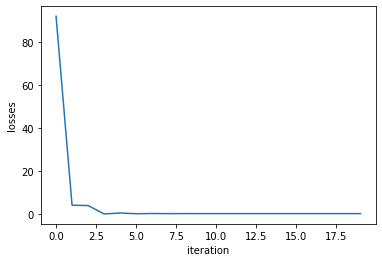

In [3]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()